In [211]:
import numpy as np
import pandas as pd
from scipy import constants 
import matplotlib
import matplotlib.pyplot as plt
import bs4
import requests

In [212]:
bs=bs4.BeautifulSoup(requests.get('https://nssdc.gsfc.nasa.gov/planetary/factsheet/planet_table_ratio.html').content,'lxml')
tables=bs.find_all('table')
df=pd.read_html(str(tables[0]))[0]
df.columns = df.iloc[0]
df.drop([0,19], inplace = True)
df.rename(columns={np.nan:'Attribute'}, inplace = True)
df.set_index('Attribute', inplace = True)

In [213]:
df

,MERCURY,VENUS,EARTH,MOON,MARS,JUPITER,SATURN,URANUS,NEPTUNE,PLUTO
Attribute,,,,,,,,,,
Mass,0.0553,0.815,1,0.0123,0.107,317.8,95.2,14.5,17.1,0.0022
Diameter,0.383,0.949,1,0.2724,0.532,11.21,9.45,4.01,3.88,0.187
Density,0.985,0.951,1,0.606,0.714,0.241,0.125,0.230,0.297,0.336
Gravity,0.378,0.907,1,0.166,0.377,2.36,0.916,0.889,1.12,0.071
Escape Velocity,0.384,0.926,1,0.213,0.450,5.32,3.17,1.90,2.10,0.116
Rotation Period,58.8,-244,1,27.4,1.03,0.415,0.445,-0.720,0.673,6.41
Length of Day,175.9,116.8,1,29.5,1.03,0.414,0.444,0.718,0.671,6.39
Distance from Sun,0.387,0.723,1,0.00257*,1.52,5.20,9.57,19.17,30.18,39.48
Perihelion,0.313,0.731,1,0.00247*,1.41,5.04,9.23,18.58,30.40,30.16


MERCURY: 3.702136607545393
VENUS: 8.886894828130659
EARTH: 9.820302293385645
MOON: 1.627855164198847
MARS: 3.712661630788427
JUPITER: 24.835192141892218
SATURN: 10.468830977075823
URANUS: 8.855317022536667
NEPTUNE: 11.154690271076532
PLUTO: 0.6178233591308993


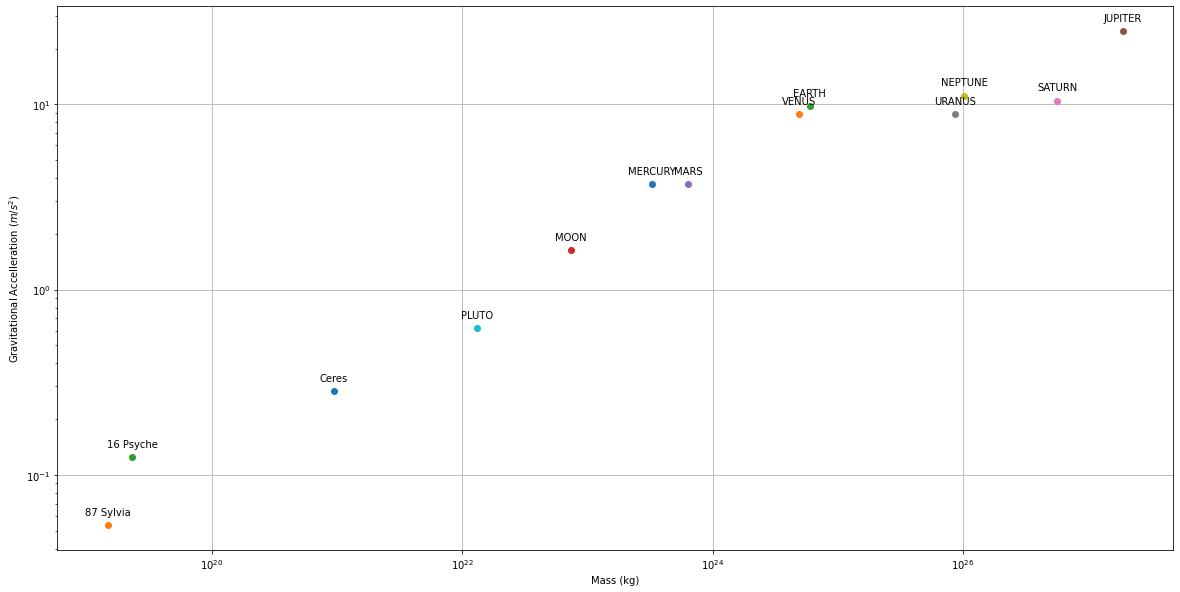

In [214]:
G = constants.G
Earth_M = 5.9722 * (10**24)
Earth_r = 6371.000 * (10**3)


fig = plt.figure(figsize=(20,10))
axes = fig.add_subplot()



for planet in df.columns:
    M = float( df[planet]['Mass'] ) * Earth_M 
    r = float(df[planet]['Diameter']) * Earth_r
    g = G * M / (r**2)
    # print(planet + ": " + str(M)
    print(planet + ": " + str(g))
    axes.plot(M, g, marker="o")
    axes.annotate(planet, (M,g), textcoords="offset points", xytext=(0,10), ha='center')

extras = { 'Ceres' : {'M': 9.38*10**20, 'r' : 470*(10**3)}, 
          '87 Sylvia' : {'M': 1.48*10**19, 'r' : 136*(10**3)},
          '16 Psyche' : {'M': 2.3*10**19, 'r' : 111*(10**3)}
         }

for obj in extras:
    M = float( extras[obj]['M'] )
    r = float(extras[obj]['r'] )
    g = G * M / (r**2)
    axes.plot(M, g, marker="o")
    axes.annotate(obj, (M,g), textcoords="offset points", xytext=(0,10), ha='center')

    
axes.set_ylabel('Gravitational Accelleration ($m/s^2$)')
axes.set_xlabel('Mass (kg)')
axes.grid()
axes.set_xscale('log')
axes.set_yscale('log')
plt.savefig('q1.png')
plt.show()